# Predicting Catalog Demand using Linear Regression

The Business Problem

You recently started working for a company that manufactures and sells high-end home goods. Last year the company sent out its first print catalog, and is preparing to send out this year's catalog in the coming months. The company has 250 new customers from their mailing list that they want to send the catalog to.

Your manager has been asked to determine how much profit the company can expect from sending a catalog to these customers. You, the business analyst, are assigned to help your manager run the numbers. While fairly knowledgeable about data analysis, your manager is not very familiar with predictive models.

You’ve been asked to predict the expected profit from these 250 new customers. Management does not want to send the catalog out to these new customers unless the expected profit contribution exceeds $10,000.

## Details
- The costs of printing and distributing is $6.50 per catalog.

- The average gross margin (price - cost) on all products sold through the catalog is 50%.

- Make sure to multiply your revenue by the gross margin first before you subtract out the $6.50 cost when calculating your profit.

Write a short report with your recommendations outlining your reasons why the company should go with your recommendations to your manager.

## Steps to Success

### Step 1: Business and Data Understanding

Your project should include:
  
  A description of the key business decisions that need to be made.


Note: Clean data is provided for this project, so you can skip the data preparation step of the Problem Solving Framework.

### Step 2: Analysis, Modeling, and Validation


Build a linear regression model, then use it to predict sales for the 250 customers. We encourage you to use Alteryx to build the best linear model with your data.

Note: For students using software other than Alteryx, if you decide to use Customer Segment as one of your predictor variables, please set the base case to Credit Card Only.

However, feel free to use any tool you’d like. You should create your linear regression model and come up with a linear regression equation.

Once you have your linear regression equation, you should use your linear regression equation to predict sales for the individual people in your mailing list.

### Step 3: Writeup

Once you have your predicted or expected profit, write a brief report with your recommendation to whether the company should send the catalog or not.

Hint: We want to calculate the expected revenue from these 250 people in order to get expected profit. This means we need to multiply the probability that a person will buy our catalog as well. For example, if a customer were to buy from us, we predict this customer will buy $450 worth of products.

At a 30% chance that this person will actually buy from us, we can expect revenue to be $450 x 30% = $135.


Import important libraries

In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

Load the data into DataFrame

In [70]:
df_p = pd.read_excel('data/p1-customers.xlsx')
# Explore the first five rows
df_p.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [71]:
# Understand the data
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
Name                          2375 non-null object
Customer_Segment              2375 non-null object
Customer_ID                   2375 non-null int64
Address                       2375 non-null object
City                          2375 non-null object
State                         2375 non-null object
ZIP                           2375 non-null int64
Avg_Sale_Amount               2375 non-null float64
Store_Number                  2375 non-null int64
Responded_to_Last_Catalog     2375 non-null object
Avg_Num_Products_Purchased    2375 non-null int64
#_Years_as_Customer           2375 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 222.8+ KB


In [72]:
# Statistical Summary of numeric data
df_p.describe(exclude='object')

,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,1647.845474,80123.333474,399.774093,104.297684,3.347368,4.500632
std,962.728105,107.255770,340.115808,2.837240,2.738568,2.309986
min,2.000000,80002.000000,1.220000,100.000000,1.000000,1.000000
25%,820.500000,80014.000000,168.925000,101.000000,1.000000,2.000000
50%,1629.000000,80123.000000,281.320000,105.000000,3.000000,5.000000
75%,2492.500000,80221.000000,572.400000,107.000000,5.000000,6.000000
max,3335.000000,80640.000000,2963.490000,109.000000,26.000000,8.000000


In [73]:
# Shape of the dataset
df_p.shape

(2375, 12)

In [74]:
# check null values
df_p.isnull().sum()

Name                          0
Customer_Segment              0
Customer_ID                   0
Address                       0
City                          0
State                         0
ZIP                           0
Avg_Sale_Amount               0
Store_Number                  0
Responded_to_Last_Catalog     0
Avg_Num_Products_Purchased    0
#_Years_as_Customer           0
dtype: int64

### Data Visualization and Preprocessing

Scatterplot of predictors to see the relationship between predictors and target variable

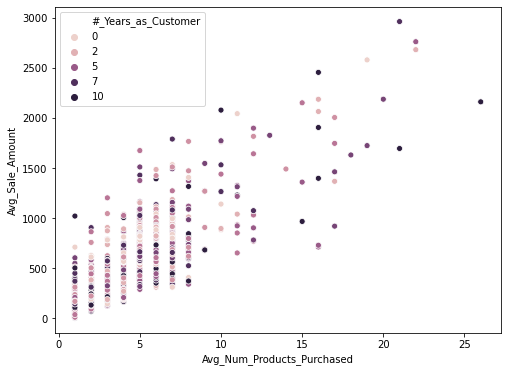

In [75]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_p, x = 'Avg_Num_Products_Purchased', y = 'Avg_Sale_Amount', hue = '#_Years_as_Customer')
plt.savefig("Years", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

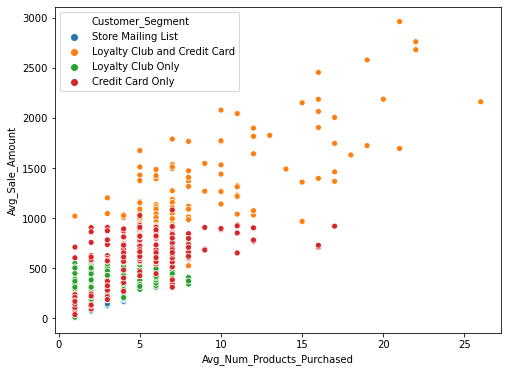

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_p, x = 'Avg_Num_Products_Purchased', y = 'Avg_Sale_Amount', hue = 'Customer_Segment')
plt.savefig("CustomerSegment", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

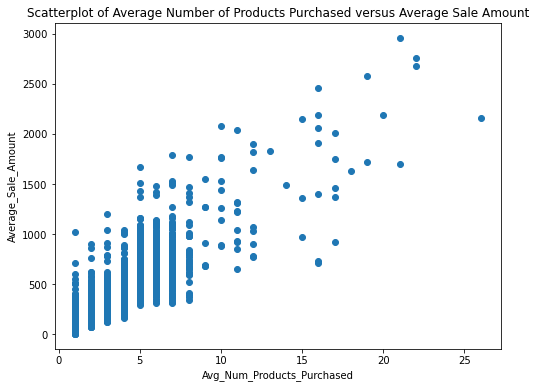

In [77]:
plt.figure(figsize=(8, 6))
ax = plt.scatter(df_p['Avg_Num_Products_Purchased'], df_p['Avg_Sale_Amount'])
plt.title("Scatterplot of Average Number of Products Purchased versus Average Sale Amount")
plt.xlabel("Avg_Num_Products_Purchased")
plt.ylabel("Average_Sale_Amount")
plt.savefig("AvgSales", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
plt.show()

From the above scatter plot, we can see that the relationship is linearly positive as Average sale amount increases the Average number of products purchased also increases.

## Convert Categorical features to numerical values using one hot encoding

In [78]:
df_p['Store_Number'].value_counts()

100    326
105    305
106    283
101    276
104    270
107    226
103    225
108    210
109    169
102     85
Name: Store_Number, dtype: int64

In [79]:
# Convert to categories and then numeric
store_num= pd.get_dummies(df_p['Store_Number'].astype(object), drop_first=True)

In [80]:
# Count the number of catogires of Customer Segment
df_p['Customer_Segment'].value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

In [81]:
# Convert to nummeric
cust_segment = pd.get_dummies(df_p['Customer_Segment'], drop_first=True)
cust_segment.head()

,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


### Selecting Features / Extracting and separating target variable

In [82]:
features = df_p[['Avg_Num_Products_Purchased', '#_Years_as_Customer']]
# Contactenate other converted variables 
X = pd.concat([features, cust_segment, store_num], axis=1)
# Add constant to the X
X = sm.add_constant(X)
y = df_p['Avg_Sale_Amount']

In [83]:
X.head()

,const,Avg_Num_Products_Purchased,#_Years_as_Customer,Loyalty Club Only,Loyalty Club and Credit Card,Store Mailing List,101,102,103,104,105,106,107,108,109
0,1.0,1,6,0,0,1,0,0,0,0,0,0,0,0,0
1,1.0,1,6,0,0,1,0,0,0,0,1,0,0,0,0
2,1.0,1,3,0,0,1,1,0,0,0,0,0,0,0,0
3,1.0,1,6,0,0,1,0,0,0,0,1,0,0,0,0
4,1.0,1,2,0,0,1,0,0,0,0,0,0,0,0,0


### Training the model

In [84]:
model = sm.OLS(y, X).fit()

In [85]:
# Statistical Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     869.8
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:28:22   Log-Likelihood:                -15055.
No. Observations:                2375   AIC:                         3.014e+04
Df Residuals:                    2360   BIC:                         3.023e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Let's look at the above statistical results. As we can see the above results, the variables other than segment_customers and avg_Num_products_purchased are the pvalue>0.05. So, according to the instructor note we drop all these variables which has a pvalue>0.05 and train the model again.

In [86]:
# Select our predictors again and contactenate other converted variables 
X = pd.concat([df_p['Avg_Num_Products_Purchased'], cust_segment], axis=1)
# Add constant to the X
X = sm.add_constant(X)
y = df_p['Avg_Sale_Amount']

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [87]:
# train the model
model = sm.OLS(y,X).fit()
# print the statistics again here
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:28:28   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Validating the model to the mailinglist dataset

In [88]:
df_m = pd.read_excel('data/p1-mailinglist.xlsx')
df_m.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [89]:
# Shape of the dataset
df_m.shape

(250, 12)

#### Repeat the same process of the above data preprocessing steps

In [90]:
# Convert categories to nummeric
cust_segment = pd.get_dummies(df_m['Customer_Segment'], drop_first=True)
# Change type of store number
#df_m['Store_Number'] = df_m['Store_Number'].astype(int)
X_features = df_m[['Avg_Num_Products_Purchased']]
# Contactenate other converted variables 
X_test = pd.concat([X_features, cust_segment], axis=1)
# Add constant to the X
X_test= sm.add_constant(X_test)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [91]:
# Predict the amount the company earn
Predicted_Sale_Amount = model.predict(X_test)

In [92]:
Predicted_Sale_Amount[:5]

0    355.036364
1    987.159466
2    622.941184
3    288.060159
4    422.012569
dtype: float64

In [93]:
df_m['Predicted_Sale_Amount'] = round(Predicted_Sale_Amount, 2)
df_m['Actual_Sale_Amount'] = round(df_m['Score_Yes'] * df_m['Predicted_Sale_Amount'], 2)

In [94]:
df_m.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Predicted_Sale_Amount,Actual_Sale_Amount
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,355.04,108.30
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,987.16,466.65
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,622.94,360.61
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,288.06,87.90
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,422.01,163.62


### SUGGESSION AND RECOMMENDATION

### Details
- The costs of printing and distributing is $6.50 per catalog.

- The average gross margin (price - cost) on all products sold through the catalog is 50%.

- Make sure to multiply your revenue by the gross margin first before you subtract out the $6.50 cost when calculating your profit.

In [95]:
total_revenue = df_m['Actual_Sale_Amount'].sum()
print("The total amount of revenue: ${:,}".format(total_revenue))

The total amount of revenue: $47,224.729999999996


In [96]:
cost_printing_dist = 6.5 * 250
print("The cost of printing and distributing is : ${:,}".format(cost_printing_dist))

The cost of printing and distributing is : $1,625.0


In [97]:
avg_revenue = total_revenue * 0.5
print("Average revenue on all products sold through the catalog:${:,.2f}".format(avg_revenue))

Average revenue on all products sold through the catalog:$23,612.36


In [98]:
amount_profit = avg_revenue - cost_printing_dist
print("The total amount of profit the compay earn:${:,.2f}".format(amount_profit))

The total amount of profit the compay earn:$21,987.36


# Project Report

We following some basic steps and asnwer questions to help the manager to make decision.

### Step 1. Business and Understanding Problem
#### Quesitons: 
- What decisions need to be made?

Ans:- The decission the sales manager needs to make is "whether to send the catalog to 250 customers or not based the calculated profit the company earn?" 

- What data is needed to inform those decisions?

Ans:- We are given two datasets:- 

1. The historic data including the amount of sales and
2. The other is the new customer data that needs prediction of the amount of sales.
The data has 122 and 12 columns. All the columns(variables are listed below with descriptions)
<code>
name - name of the customer
Customer_Segment- the column that contains the information about customer payment method(predictor variable)
Customer_ID - identification of the customer
Address - the physical address of the customer
City - city of the customer
State - state of the customer
ZIP - zip code of the customer
Store_Number - the store number of the item
Avg_Num_Products_Purchase - average number of products the customer purchased(predictor variable)
#_Year_as_Customer - Number of year as customer
Responded_to_Last_Catalog - column that identify the sales manager is responded to the customer or not(two values: yes/no)-important for calculating the profit
Avg_Sale_Amount - column that contain the average amount of sales(Target variable)
</code>

As a business analyst, I have predicted the amount of profit that the company earns from 250 new customers based on the historic data and make a recommendation to the manager based on the predicted amount of profit the company might be earned from the new customers.

## Step 2: Analysis, Modeling, and Validation

Provide a description of how you set up your linear regression model, what variables you used and why, and the results of the model. Visualizations are encouraged. (500 word limit)


Important: Use the p1-customers.xlsx to train your linear model.
 
At the minimum, answer these questions:
 
1.     How and why did you select the predictor variables in your model? You must explain how your continuous predictor variables you’ve chosen have a linear relationship with the target variable. Please refer back to the “Multiple Linear Regression with Excel” lesson to help you explore your data and use scatterplots to search for linear relationships. You must include scatterplots in your answer.

Ans:- Before I train the model I understood the data by using the data manipulation and analysis method then once I understand the data I plot the scatterplot to understand the relationship between the target and predictor variables. Then I found `Ccustomer_Segment`, and `Avg_Num_Products_Purchased` as predictors and `Avg_Sale_Amount` as target variable because the scatterplot shows that they have a positive correlation between those variables.

<img src="images/CustomerSegment.png">
<img src="images/AvgSales.png">
 
2.     Explain why you believe your linear model is a good model. You must justify your reasoning using the statistical results that your regression model created. For each variable you selected, please justify how each variable is a good fit for your model by using the p-values and R-squared values that your model produced.
 
 Ans:- As shown in the figure below the predictors have p-values of less than 0.05 and the adjusted R-square is 0.837. I believe that our model is a good fit because the p-values and the R-square are statistically significant.
 <img src="images/static.jpg">
 

3. 	What is the best linear regression equation based on the available data? Each coefficient should have no more than 2 digits after the decimal (ex: 1.28)
 
Important: The regression equation should be in the form:
 
$$Avg_Sale_Amount = 303.46 - 149.36 * (Customer_Segment:Loyalty Club Only) + 281.84 * (Customer_Segment:Loyalty Club and Credit Card) - 245.42 * (Customer_Segment:Store Mailing List) + 66.98 * (Avg_Num_Products_Purchased)$$

## Step 3: Presentation/Visualization
Use your model results to provide a recommendation. (500 word limit)
 
At the minimum, answer these questions:
 

1.     What is your recommendation? Should the company send the catalog to these 250 customers?
 
 Yes, I would recommend the company should send the catalog to the 250 customers.



2.     How did you come up with your recommendation? (Please explain your process so reviewers can give you feedback on your process)


I first created a new column("Predicted_Sale_Amount") and then I calculated the Actaul_Sale_Amount by multiplying Predicted_Sale_Amount and  Score_Yes and created a new column called Actual_Sale_Amount. 

Then, I calculated the total amount of revenue by summing up the actual sale amount. Finally, I calculated the total profit using the following formula:-

`total_profit = total_revenue * 0.5(50% of the average gross margin) - 6.5 * 250(cost of printing and distributing for 250 customers)`.

Therefore, the total amount of profit is `$21,987.36`.


3.     What is the expected profit from the new catalog (assuming the catalog is sent to these 250 customers)?

The total amount of profit that the company earns by sending a catalog to 250 new customers is `$ 21,987.36`. The amount that the company expected to earn is almost double the expected amount that the company earns by sending a catalog to these 250 new customers. From this, I would recommend to the sales manager to send a catalog to the new 250 customers and earn `
$21,987.36 USD` as a profit from the new customers' sales.